Great Outdoors week 9

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('go_sales_train.sqlite')

# List all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

# Update the query to use the correct table name
returned_item = pd.read_sql("SELECT * FROM returned_item", conn)
returned_item


,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY
0,1491,Aug 1 2023 4:10AM,84858,5,8
1,1492,Dec 6 2022 6:46PM,84440,2,2
2,1493,Jun 24 2023 9:23AM,84867,4,22
3,1494,Jul 21 2023 12:00AM,84873,3,20
4,1496,Oct 7 2022 5:13AM,84488,1,2
...,...,...,...,...,...
614,2464,Dec 7 2023 5:14AM,114967,1,12
615,2465,Jun 6 2023 9:22AM,114972,3,24
616,2466,Oct 6 2023 12:31PM,114983,5,66
617,2467,Mar 31 2024 3:39PM,115215,4,64


In [14]:
df = returned_item.loc[:, ['RETURN_CODE', 'ORDER_DETAIL_CODE', 'RETURN_REASON_CODE']]
df

,RETURN_CODE,ORDER_DETAIL_CODE,RETURN_REASON_CODE
0,1491,84858,5
1,1492,84440,2
2,1493,84867,4
3,1494,84873,3
4,1496,84488,1
...,...,...,...
614,2464,114967,1
615,2465,114972,3
616,2466,114983,5
617,2467,115215,4


In [15]:
dummies_df = pd.get_dummies(df.loc[:, ['RETURN_CODE']])
dummies_df

,RETURN_CODE
0,1491
1,1492
2,1493
3,1494
4,1496
...,...
614,2464
615,2465
616,2466
617,2467


In [17]:
df = pd.concat([df, dummies_df], axis = 1)
df = df.drop(['RETURN_CODE'], axis = 1)
df = df.loc[:, ['ORDER_DETAIL_CODE', 'RETURN_REASON_CODE']]
df

,ORDER_DETAIL_CODE,RETURN_REASON_CODE
0,84858,5
1,84440,2
2,84867,4
3,84873,3
4,84488,1
...,...,...
614,114967,1
615,114972,3
616,114983,5
617,115215,4


Snijden

In [18]:
X = df.loc[df['ORDER_DETAIL_CODE'].notna(), :]
X = X.drop('ORDER_DETAIL_CODE', axis = 1)
y = df.loc[df['ORDER_DETAIL_CODE'].notna(), ['ORDER_DETAIL_CODE']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 618
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   RETURN_REASON_CODE  619 non-null    int64
dtypes: int64(1)
memory usage: 9.7 KB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
)

# Regressiemodel

In [20]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [21]:
y_pred= reg_model.predict(X_test)
y_pred

array([[84188.1130568 ],
       [84188.1130568 ],
       [84446.157938  ],
       [84188.1130568 ],
       [84188.1130568 ],
       [85220.29258159],
       [84704.2028192 ],
       [84962.2477004 ],
       [85220.29258159],
       [84446.157938  ],
       [84188.1130568 ],
       [84962.2477004 ],
       [84446.157938  ],
       [85220.29258159],
       [84446.157938  ],
       [84188.1130568 ],
       [85220.29258159],
       [85220.29258159],
       [84962.2477004 ],
       [84188.1130568 ],
       [84446.157938  ],
       [85220.29258159],
       [84962.2477004 ],
       [84962.2477004 ],
       [84962.2477004 ],
       [85220.29258159],
       [84188.1130568 ],
       [84188.1130568 ],
       [84188.1130568 ],
       [84188.1130568 ],
       [84962.2477004 ],
       [84704.2028192 ],
       [84962.2477004 ],
       [84188.1130568 ],
       [84962.2477004 ],
       [84962.2477004 ],
       [84704.2028192 ],
       [85220.29258159],
       [85220.29258159],
       [84962.2477004 ],


In [29]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: 'predicted_order_detail_code'})
prediction_df = prediction_df.map(lambda x: f'{x:.4f}')
prediction_df

,predicted_order_detail_code
0,84188.1131
1,84188.1131
2,84446.1579
3,84188.1131
4,84188.1131
...,...
88,84188.1131
89,85220.2926
90,85220.2926
91,84188.1131


In [31]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['ORDER_DETAIL_CODE'], prediction_df], axis = 1)
y_test_prediction_merge.loc[y_test_prediction_merge['predicted_order_detail_code'].notna(), :]

,ORDER_DETAIL_CODE,predicted_order_detail_code
0,49576,84188.1131
1,83355,84188.1131
2,109956,84446.1579
3,97030,84188.1131
4,107445,84188.1131
...,...,...
88,106340,84188.1131
89,53489,85220.2926
90,50744,85220.2926
91,80696,84188.1131


# scatterplot

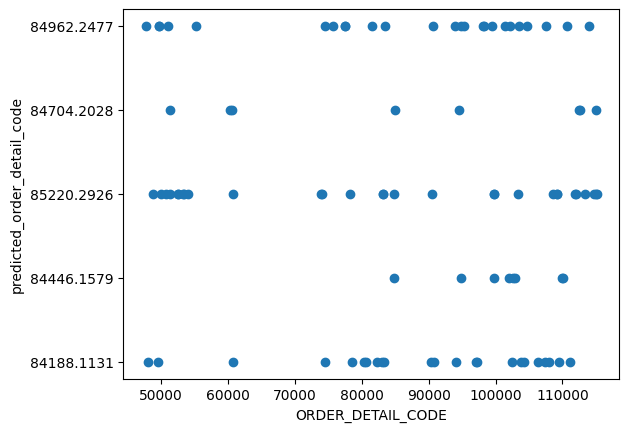

In [32]:
plt.scatter(y_test_prediction_merge['ORDER_DETAIL_CODE'], y_test_prediction_merge['predicted_order_detail_code'])
plt.xlabel('ORDER_DETAIL_CODE')
plt.ylabel('predicted_order_detail_code')
plt.show()

## mean sq2 error

In [33]:
mean_squared_error(y_test_prediction_merge['ORDER_DETAIL_CODE'], y_test_prediction_merge['predicted_order_detail_code'])

473112761.5004128

## mean absolute error

In [34]:
mean_absolute_error(y_test_prediction_merge['ORDER_DETAIL_CODE'], y_test_prediction_merge['predicted_order_detail_code'])

18785.313189247314